In [1]:
import os

os.environ["KAGGLE_USERNAME"] = "brainmentors"
os.environ["KAGGLE_KEY"] = "330adc4235f7824c524352f486623320"

!kaggle datasets download -d shubhampokhrel81/vegetables360-dataset

vegetables360-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
!unzip vegetables360-dataset.zip

Archive:  vegetables360-dataset.zip
  inflating: dataset/cabbage/20190801-144110-394785.jpg  
  inflating: dataset/cabbage/20190801-144110-538783.jpg  
  inflating: dataset/cabbage/20190801-144110-660251.jpg  
  inflating: dataset/cabbage/20190801-144110-791485.jpg  
  inflating: dataset/cabbage/20190801-144110-918191.jpg  
  inflating: dataset/cabbage/20190801-144111-034737.jpg  
  inflating: dataset/cabbage/20190801-144111-171723.jpg  
  inflating: dataset/cabbage/20190801-144111-306416.jpg  
  inflating: dataset/cabbage/20190801-144111-455960.jpg  
  inflating: dataset/cabbage/20190801-144111-603830.jpg  
  inflating: dataset/cabbage/20190801-144111-731021.jpg  
  inflating: dataset/cabbage/20190801-144111-846236.jpg  
  inflating: dataset/cabbage/20190801-144111-993728.jpg  
  inflating: dataset/cabbage/20190801-144112-135773.jpg  
  inflating: dataset/cabbage/20190801-144112-272261.jpg  
  inflating: dataset/cabbage/20190801-144112-400853.jpg  
  inflating: dataset/cabbage/2019080

In [3]:
len(os.listdir("dataset/chilli"))

190

In [57]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

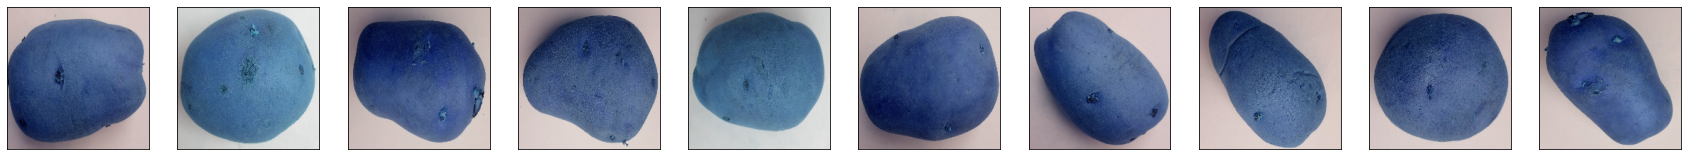

In [12]:
potato_path = "dataset/potato/"

plt.figure(figsize=(30,6))
potato_images = os.listdir(potato_path)
for i in range(10):
  img = cv2.imread(potato_path + potato_images[i])
  img = cv2.resize(img, (200,200))
  ax = plt.subplot(1,10,i+1)
  plt.imshow(img)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

In [38]:
images = []
labels = []

ROOT_DIR = "dataset"
for root, folders, files in os.walk(ROOT_DIR):
  if len(files) > 1:
    for file in files:
      path = root + "/" + file
      img = cv2.imread(path)
      img = cv2.resize(img, (100,100))
      images.append(img)
      targetname = root.split("/")[-1]
      labels.append(targetname)

In [39]:
images = np.asarray(images)
labels = np.asarray(labels)

In [40]:
images.shape

(1225, 100, 100, 3)

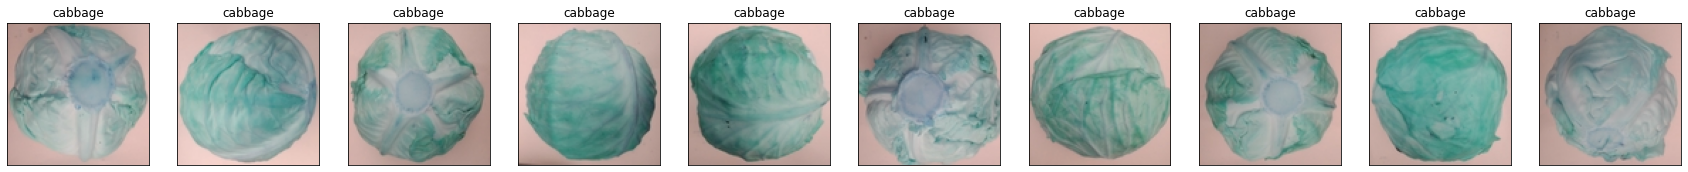

In [41]:
plt.figure(figsize=(30,6))
for i in range(10):
  ax = plt.subplot(1,10,i+1)
  plt.imshow(images[400+i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.title(labels[400+i])
plt.show()

In [42]:
images = images.reshape(images.shape[0], -1)

In [43]:
images.shape

(1225, 30000)

In [44]:
labels[:5]

array(['potato', 'potato', 'potato', 'potato', 'potato'], dtype='<U7')

In [45]:
np.unique(labels, return_counts=True)

(array(['cabbage', 'chilli', 'ginger', 'onion', 'potato'], dtype='<U7'),
 array([200, 190, 187, 390, 258]))

In [46]:
labelEncoder = LabelEncoder()
labels = labelEncoder.fit_transform(labels)

In [47]:
labels[:5]

array([4, 4, 4, 4, 4])

In [48]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4]), array([200, 190, 187, 390, 258]))

In [49]:
targetMapping = {0 : 'cabbage', 1 : 'chilli', 2 : 'ginger', 3 : 'onion', 4 : 'potato'}

In [51]:
# Normalization
images = images / 255.0

In [52]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.25)

In [55]:
logistic = LogisticRegression(max_iter=1000)
logistic.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [58]:
y_pred = logistic.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy : ",acc)

Accuracy :  0.996742671009772
